# **Useful Resources**
* **How TRansformers Works**
  * [Jay Alammar - Transformers](https://jalammar.github.io/illustrated-transformer/)
  * [Data Camp](https://www.datacamp.com/tutorial/how-transformers-work)
* **Coding Example**
  * [Annotated-Transformers with PyTorch](http://nlp.seas.harvard.edu/annotated-transformer/)
  * [Data Camp Transformers code](https://www.datacamp.com/tutorial/building-a-transformer-with-py-torch)
* **YouTube Playlist**
  * [Transformers from scratch](https://youtube.com/playlist?list=PLTl9hO2Oobd97qfWC40gOSU8C0iu0m2l4&feature=shared)
  * [3Blue1Brown: Visual Explaining](https://youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&feature=shared)
* **Preprocessing**
  * [TMX to DataFrame](https://medium.com/@said.surucu/step-by-step-guide-to-converting-tmx-files-to-excel-using-python-c4dc72ef0875)

### **Architecture**

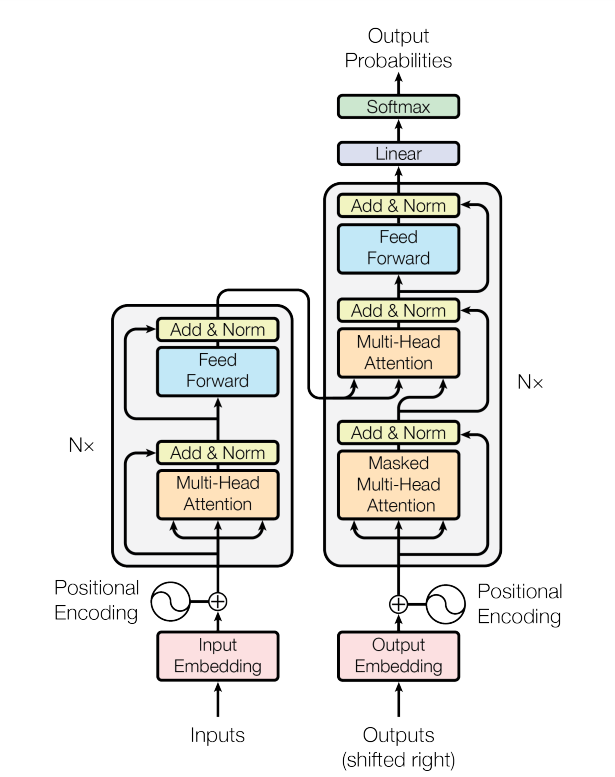

## **Libraries**

In [ ]:
# !pip3 install -q torch torchvision torchaudio

In [ ]:
# !pip install -q transformers datasets numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import json
import re
import math
from transformers import AutoTokenizer
from datasets import load_dataset
from tqdm import tqdm
import gdown
import sys
import os
from lxml import etree

## **Set Up**

### **Device**

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


### **Tokenizer Huggingface**

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("gpt2")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
tokenizer.add_special_tokens({'pad_token': '[PAD]'})
tokenizer.add_special_tokens({'bos_token': '[START]'})
tokenizer.add_special_tokens({'eos_token': '[END]'})

1

### **Dataset**

#### **Huggingface Dataset**

In [ ]:
# en_uz_dataset_train = load_dataset("Helsinki-NLP/opus-100", "en-uz", split="train")
# en_uz_dataset_test = load_dataset("Helsinki-NLP/opus-100", "en-uz", split="test")
# en_uz_dataset_validation = load_dataset("Helsinki-NLP/opus-100", "en-uz", split="validation")

In [ ]:
# print(f"Train dataset contain: {en_uz_dataset_train.num_rows} rows")
# print(f"Test dataset contain: {en_uz_dataset_test.num_rows} rows")
# print(f"Validation dataset contain: {en_uz_dataset_validation.num_rows} rows")

In [ ]:
# train_data = en_uz_dataset_train.to_pandas()
# test_data = en_uz_dataset_test.to_pandas()
# validation_data = en_uz_dataset_validation.to_pandas()

# collect_train = []
# collect_test = []
# collect_validation = []

# for i in range(train_data.shape[0]):
#     collect_train.append(train_data.translation[i])

# for i in range(test_data.shape[0]):
#     collect_test.append(test_data.translation[i])

# for i in range(validation_data.shape[0]):
#     collect_validation.append(validation_data.translation[i])

# df_train = pd.DataFrame(collect_train)
# df_test = pd.DataFrame(collect_test)
# df_validation = pd.DataFrame(collect_validation)

In [ ]:
# def cyrillic_to_latin(text):
#     cyrillic_to_latin_map = {
#         'А': 'A', 'Б': 'B', 'В': 'V', 'Г': 'G', 'Ғ': "G'", 'Д': 'D', 'Е': 'E', 'Ё': 'Yo', 'Ж': 'Zh', 'З': 'Z',
#         'И': 'I', 'Й': 'Y', 'К': 'K', 'Қ': "Q", 'Л': 'L', 'М': 'M', 'Н': 'N', 'О': 'O', 'П': 'P',
#         'Р': 'R', 'С': 'S', 'Т': 'T', 'У': 'U', 'Ў': "O'", 'Ф': 'F', 'Х': 'X','Ҳ':'H', 'Ц': 'Ts', 'Ч': 'Ch', 'Ш': 'Sh',
#         'Щ': 'Shch', 'Ъ': '', 'Ы': 'Y', 'Ь': '', 'Э': 'E', 'Ю': 'Yu', 'Я': 'Ya',
#         'а': 'a', 'б': 'b', 'в': 'v', 'г': 'g', 'ғ': "g'", 'д': 'd', 'е': 'e', 'ё': 'yo', 'ж': 'zh', 'з': 'z',
#         'и': 'i', 'й': 'y', 'к': 'k', 'қ': "q", 'л': 'l', 'м': 'm', 'н': 'n', 'о': 'o', 'п': 'p',
#         'р': 'r', 'с': 's', 'т': 't', 'у': 'u', 'ў': "o'", 'ф': 'f','x': 'x', 'ҳ': 'h', 'ц': 'ts', 'ч': 'ch', 'ш': 'sh',
#         'щ': 'shch', 'ъ': '', 'ы': 'y', 'ь': '', 'э': 'e', 'ю': 'yu', 'я': 'ya'
#     }
#     return ''.join(cyrillic_to_latin_map.get(char, char) for char in text)

# if 'uz' in df_train.columns:
#     df_train['uz'] = df_train['uz'].apply(lambda x: cyrillic_to_latin(x) if isinstance(x, str) else x)
# else:
#     print("Warning: 'uz' column not found in df_train.")

In [ ]:
# def process_text(text):
#     text = "[START] " + text
#     text = text.replace(".", ". [SEP]")
#     text = text + " [END]"
#     return text

# if 'en' in df_train.columns:
#     df_train['en'] = df_train['en'].apply(process_text)
# else:
#     print("Warning: 'translation' column not found in df_train.")

# if 'uz' in df_train.columns:
#     df_train['uz'] = df_train['uz'].apply(process_text)
# else:
#     print("Warning: 'translation' column not found in df_train.")

In [ ]:
# df_train.head()

#### **OPUS**

In [ ]:
file_id_1 = '1iatSQC7DLrp0cM59mFaoNWlKAL52JSx_' # en-ru
file_id_2 = "1DffdV3qeg4ETMxHc6R-dgYH7IOT15vue" #en-tr
file_id_3 = "1ZYPUZpL7Aff0_x1Xq1vDwQXmfZ7_-m9f" #en-uz
url = f'https://drive.google.com/uc?export=download&id={file_id_3}'

gdown.download(url, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1ZYPUZpL7Aff0_x1Xq1vDwQXmfZ7_-m9f
From (redirected): https://drive.google.com/uc?export=download&id=1ZYPUZpL7Aff0_x1Xq1vDwQXmfZ7_-m9f&confirm=t&uuid=585f9ca4-2ff0-42ca-959c-765ce0b5045d
To: /content/en-uz.tmx.gz
100%|██████████| 109M/109M [00:01<00:00, 55.2MB/s]


'en-uz.tmx.gz'

In [ ]:
!gunzip "/content/en-uz.tmx.gz"

In [ ]:
FILE_PATH_1 = "/content/en-ru.tmx"
FILE_PATH_2 = "/content/en-tr.tmx"
FILE_PATH_3 = "/content/en-uz.tmx"
xml_tree = etree.parse(FILE_PATH_3)

In [ ]:
df = pd.DataFrame(columns=["Source", "Target"], dtype="string")

In [ ]:
trans_units = xml_tree.findall(".//tu")

In [ ]:
source_texts = []
target_texts = []
for trans_unit in trans_units:
    tuv1 = trans_unit.findall(".//tuv")[0]
    tuv2 = trans_unit.findall(".//tuv")[1]
    source = tuv1.findall(".//seg")[0]
    target = tuv2.findall(".//seg")[0]

    source_text = ''.join(source.itertext())
    target_text = ''.join(target.itertext())

    source_texts.append(source_text)
    target_texts.append(target_text)

In [ ]:
df["Source"] = source_texts
df["Target"] = target_texts

In [ ]:
def remove_parentheses(text):
    if isinstance(text, str):
        return re.sub(r'[()]', '', text)
    return text

In [ ]:
def process_text(text):
    text = "[START] " + text
    text = text.replace(".", ". [SEP]")
    text = text + " [END]"
    return text

In [ ]:
df['Source'] = df['Source'].apply(remove_parentheses)
df['Target'] = df['Target'].apply(remove_parentheses)
df['Source'] = df['Source'].apply(process_text)
df['Target'] = df['Target'].apply(process_text)

In [ ]:
df.head()

,Source,Target
0,[START] Jizzakh branch of the National Univers...,[START] Oʻzbekiston milliy universitetining Ji...
1,[START] Jizzakh branch of the National Univers...,[START] Mirzo Ulugʻbek nomidagi Oʻzbekiston mi...
2,[START] Established in 2019. [SEP] [END],[START] 2019-yilda tashkil topgan. [SEP] [END]
3,"[START] At the same time, Shermuhammedova Nigi...",[START] Shu bilan bir qatorda Mirzo Ulugʻbek n...
4,[START] The branch is planning to introduce mo...,[START] Filialda xorijiy davlatlarning etakchi...


In [ ]:
df_train = df.copy()

## **Data Loading**

### **Configuration**

In [ ]:
tokenizer.encode("[END]")

[50259]

In [ ]:
src_vocab_size = 50260 # After adding special tokens to tokenizer
tgt_vocab_size = 50260 # After adding special tokens to tokenizer
max_length = 128 # Max Context legth (How muuc text model can process at once)
d_model = 512 # Dimension of model
num_heads = 8 # Number of heads in attention
num_layers = 6 # Number of blocks: 6 encoder and 6 decoder
d_ff = 2048 # Dimention of Feed Forward layer
dropout = 0.1 # Dropout
batch_size = 32 # Change this based on your device. Making it power of 2 numbers is good

In [ ]:
english_sentences = []
uzbek_sentences = []

for i in range(len(df_train)):
    english_sentences.append(df_train['Source'][i])
    uzbek_sentences.append(df_train['Target'][i])

In [ ]:
class TranslationDataset(Dataset):
    def __init__(self, english_sentences, uzbek_sentences, tokenizer, max_length):
        self.english_sentences = english_sentences
        self.uzbek_sentences = uzbek_sentences
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.english_sentences)

    def __getitem__(self, idx):
        # Tokenize and encode sentences
        en_encoded = self.tokenizer(
            self.english_sentences[idx],
            return_tensors="pt",
            padding="max_length",
            truncation=True,
            max_length=self.max_length
        )["input_ids"].squeeze(0)

        uz_encoded = self.tokenizer(
            self.uzbek_sentences[idx],
            return_tensors="pt",
            padding="max_length",
            truncation=True,
            max_length=self.max_length
        )["input_ids"].squeeze(0)

        return en_encoded, uz_encoded

In [ ]:
dataset = TranslationDataset(english_sentences, uzbek_sentences, tokenizer, max_length)
dataloader = DataLoader(dataset, batch_size, shuffle=True)

In [ ]:
for batch in dataloader:
    en_data, uz_data = batch
    print(en_data)
    print(uz_data)
    break

tensor([[50258,   317, 10595,  ..., 50257, 50257, 50257],
        [50258, 14444,   284,  ..., 50257, 50257, 50257],
        [50258,  4186,  8041,  ..., 50257, 50257, 50257],
        ...,
        [50258,   554,  5472,  ..., 50257, 50257, 50257],
        [50258, 11450,   339,  ..., 50257, 50257, 50257],
        [50258,   352,   362,  ..., 50257, 50257, 50257]])
tensor([[50258,  2930,  8482,  ..., 50257, 50257, 50257],
        [50258,   575,   333,  ..., 50257, 50257, 50257],
        [50258,  4186,  8041,  ..., 50257, 50257, 50257],
        ...,
        [50258,  5472,    12,  ..., 50257, 50257, 50257],
        [50258,  7383,  8589,  ..., 50257, 50257, 50257],
        [50258,  7823, 12771,  ..., 50257, 50257, 50257]])


### **Encoder**
- **Input**: The entire input sequence.  
  Example: `"I love apples"`
  
- **Process**:  
  The encoder processes the entire sequence at once, using self-attention and feed-forward layers to capture the contextual meaning of the input. Each token attends to every other token, creating contextual embeddings.

- **Output**:  
  Contextual embeddings for the input tokens:  
  `[C("I"), C("love"), C("apples")]`

### **Decoder**
- **Input**: The target sequence, shifted one unit to the right.  
  Example: `<start> Men olmalarni yaxshi ko'raman <end>`

- **Process**:  
  The decoder generates the target sequence **step-by-step**, using the encoder’s output (contextual embeddings) and the tokens it has seen so far.

#### **Step-by-Step Processing in the Decoder**:
1. **Step 1**:  
   - Input: `<start>`  
   - Output: Predicts `"Men"` (the first token in the target sequence).

2. **Step 2**:  
   - Input: `<start> Men`  
   - Output: Predicts `"olmalarni"` (the second token in the target sequence).

3. **Step 3**:  
   - Input: `<start> Men olmalarni`  
   - Output: Predicts `"yaxshi"` (the third token in the target sequence).

4. **Step 4**:  
   - Input: `<start> Men olmalarni yaxshi`  
   - Output: Predicts `"ko'raman"` (the fourth token in the target sequence).

5. **Step 5**:  
   - Input: `<start> Men olmalarni yaxshi ko'raman`  
   - Output: Predicts `<end>` (to indicate the end of the sequence).

- **Final Output**:  
  `<start> Men olmalarni yaxshi ko'raman <end>`

## **Multi Head Attention**

In [ ]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"

        self.d_model = d_model
        self.num_heads = num_heads
        self.d_k = d_model // num_heads
        self.W_q = nn.Linear(d_model, d_model)
        self.W_k = nn.Linear(d_model, d_model)
        self.W_v = nn.Linear(d_model, d_model)
        self.W_o = nn.Linear(d_model, d_model)

    def scaled_dot_product_attention(self, Q, K, V, mask=None):
        attn_scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.d_k)
        if mask is not None:
            attn_scores = attn_scores.masked_fill(mask == 0, -1e9)
        attn_probs = torch.softmax(attn_scores, dim=-1)
        output = torch.matmul(attn_probs, V)
        return output

    def split_heads(self, x):
        batch_size, seq_length, d_model = x.size()
        return x.view(batch_size, seq_length, self.num_heads, self.d_k).transpose(1, 2)

    def combine_heads(self, x):
        batch_size, _, seq_length, d_k = x.size()
        return x.transpose(1, 2).contiguous().view(batch_size, seq_length, self.d_model)

    def forward(self, Q, K, V, mask=None):
        Q = self.split_heads(self.W_q(Q))
        K = self.split_heads(self.W_k(K))
        V = self.split_heads(self.W_v(V))
        attn_output = self.scaled_dot_product_attention(Q, K, V, mask)
        output = self.W_o(self.combine_heads(attn_output))
        return output

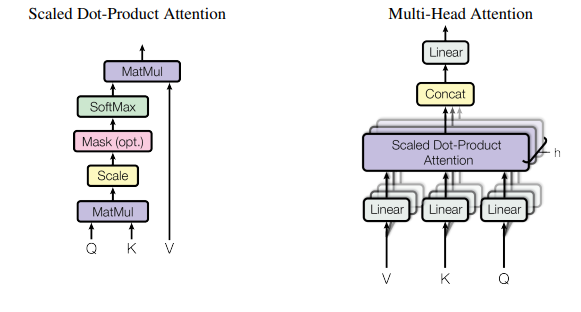

## **Feed Forward**

In [ ]:
class PositionWiseFeedForward(nn.Module):
    def __init__(self, d_model, d_ff):
        super(PositionWiseFeedForward, self).__init__()
        self.fc1 = nn.Linear(d_model, d_ff)
        self.fc2 = nn.Linear(d_ff, d_model)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.fc2(self.relu(self.fc1(x)))

## **Positional Encoding**

In [ ]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_seq_length):
        super(PositionalEncoding, self).__init__()

        pe = torch.zeros(max_seq_length, d_model)
        position = torch.arange(0, max_seq_length, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model))

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        self.register_buffer('pe', pe.unsqueeze(0))

    def forward(self, x):
        return x + self.pe[:, :x.size(1)]

## **Encoder**

In [ ]:
class EncoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(EncoderLayer, self).__init__()
        self.self_attn = MultiHeadAttention(d_model, num_heads)
        self.feed_forward = PositionWiseFeedForward(d_model, d_ff)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, mask):
        attn_output = self.self_attn(x, x, x, mask)
        x = self.norm1(x + self.dropout(attn_output))
        ff_output = self.feed_forward(x)
        x = self.norm2(x + self.dropout(ff_output))
        return x

## **Decoder**

In [ ]:
class DecoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(DecoderLayer, self).__init__()
        self.self_attn = MultiHeadAttention(d_model, num_heads)
        self.cross_attn = MultiHeadAttention(d_model, num_heads)
        self.feed_forward = PositionWiseFeedForward(d_model, d_ff)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.norm3 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, enc_output, src_mask, tgt_mask):
        attn_output = self.self_attn(x, x, x, tgt_mask)
        x = self.norm1(x + self.dropout(attn_output))
        attn_output = self.cross_attn(x, enc_output, enc_output, src_mask)
        x = self.norm2(x + self.dropout(attn_output))
        ff_output = self.feed_forward(x)
        x = self.norm3(x + self.dropout(ff_output))
        return x

## **Architecture**

In [ ]:
class Transformer(nn.Module):
    def __init__(self, src_vocab_size, tgt_vocab_size, d_model, num_heads, num_layers, d_ff, max_seq_length, dropout):
        super(Transformer, self).__init__()
        self.encoder_embedding = nn.Embedding(src_vocab_size, d_model)
        self.decoder_embedding = nn.Embedding(tgt_vocab_size, d_model)
        self.positional_encoding = PositionalEncoding(d_model, max_seq_length)

        self.encoder_layers = nn.ModuleList([EncoderLayer(d_model, num_heads, d_ff, dropout) for _ in range(num_layers)])
        self.decoder_layers = nn.ModuleList([DecoderLayer(d_model, num_heads, d_ff, dropout) for _ in range(num_layers)])

        self.fc = nn.Linear(d_model, tgt_vocab_size)
        self.dropout = nn.Dropout(dropout)

    def generate_mask(self, src, tgt):
        src_mask = (src != 0).unsqueeze(1).unsqueeze(2).to(src.device)
        tgt_mask = (tgt != 0).unsqueeze(1).unsqueeze(3).to(tgt.device)
        seq_length = tgt.size(1)
        nopeak_mask = (1 - torch.triu(torch.ones(1, seq_length, seq_length, device=tgt.device), diagonal=1)).bool()
        tgt_mask = tgt_mask & nopeak_mask
        return src_mask, tgt_mask

    def forward(self, src, tgt):
        src_mask, tgt_mask = self.generate_mask(src, tgt)
        src_embedded = self.dropout(self.positional_encoding(self.encoder_embedding(src)))
        tgt_embedded = self.dropout(self.positional_encoding(self.decoder_embedding(tgt)))

        enc_output = src_embedded
        for enc_layer in self.encoder_layers:
            enc_output = enc_layer(enc_output, src_mask)

        dec_output = tgt_embedded
        for dec_layer in self.decoder_layers:
            dec_output = dec_layer(dec_output, enc_output, src_mask, tgt_mask)

        output = self.fc(dec_output)
        return output

## **Training**

In [ ]:
transformer = Transformer(src_vocab_size+1, tgt_vocab_size+1, d_model, num_heads, num_layers, d_ff, max_length, dropout)

In [ ]:
criterion = nn.CrossEntropyLoss(ignore_index=50257)  # Ignore padding token
optimizer = optim.Adam(transformer.parameters(), lr=0.0001, betas=(0.9, 0.98), eps=1e-9)

### **Sample Dataset Training**

In [ ]:
print(len(dataloader))

28102


In [ ]:
transformer.train()
max_batches = 100  # Number of batches to train on

for epoch in range(3):
    total_loss = 0
    batch_count = 0  # Initialize batch counter
    progress_bar = tqdm(dataloader, desc=f"Epoch {epoch+1}", total=max_batches)

    for batch in progress_bar:
        if batch_count >= max_batches:
            break  # Stop after processing 1000 batches

        src_data, tgt_data = batch
        transformer.to(device)
        src_data, tgt_data = src_data.to(device), tgt_data.to(device)

        optimizer.zero_grad()
        output = transformer(src_data, tgt_data[:, :-1])
        loss = criterion(output.contiguous().view(-1, output.size(-1)), tgt_data[:, 1:].contiguous().view(-1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        batch_count += 1

        # Update the progress bar with the current loss
        progress_bar.set_postfix(loss=loss.item())

    print(f"Epoch {epoch+1}, Average Loss: {total_loss / batch_count:.4f}")

Epoch 1: 100%|██████████| 100/100 [01:00<00:00,  1.66it/s, loss=5.63]


Epoch 1, Average Loss: 7.0509


Epoch 2: 100%|██████████| 100/100 [01:01<00:00,  1.64it/s, loss=5.08]


Epoch 2, Average Loss: 5.1173


Epoch 3: 100%|██████████| 100/100 [01:02<00:00,  1.60it/s, loss=4.52]

Epoch 3, Average Loss: 4.7001


### **Full training**

In [ ]:
transformer.train()
for epoch in range(2):
    total_loss = 0
    for batch in tqdm(dataloader, desc=f"Epoch {epoch+1}"):
        src_data, tgt_data = batch
        transformer.to(device)
        src_data, tgt_data = src_data.to(device), tgt_data.to(device)

        optimizer.zero_grad()
        output = transformer(src_data, tgt_data[:, :-1])
        loss = criterion(output.contiguous().view(-1, output.size(-1)),tgt_data[:, 1:].contiguous().view(-1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

Epoch 1:   0%|          | 18/28102 [00:11<5:05:45,  1.53it/s]


KeyboardInterrupt: 

In [ ]:
total_params = sum(p.numel() for p in transformer.parameters())
trainable_params = sum(p.numel() for p in transformer.parameters() if p.requires_grad)

print(f"Total Parameters: {total_params}")
print(f"Trainable Parameters: {trainable_params}")

Total Parameters: 121389653
Trainable Parameters: 121389653


### **Inference**

In [ ]:
max_length = 128

In [ ]:
new_text = "Hello my name is Dovud."

input_ids = tokenizer(
    new_text,
    return_tensors="pt",
    padding="max_length",
    truncation=True,
    max_length=max_length
)["input_ids"].to(device)

transformer.eval()
tgt_ids = torch.tensor([[tokenizer.bos_token_id]], device=device)
for _ in range(max_length):
    with torch.no_grad():
        output_ids = transformer(input_ids, tgt_ids)
    next_token_id = output_ids[:, -1, :].argmax(dim=-1).item()
    tgt_ids = torch.cat([tgt_ids, torch.tensor([[next_token_id]], device=device)], dim=1)

    # Stop generating if end token is predicted
    if next_token_id == tokenizer.eos_token_id:
        break
decoded_output = tokenizer.decode(tgt_ids[0], skip_special_tokens=True)
print("Input:", new_text)
print("Output:", decoded_output)

Input: Hello my name is Dovud.
Output:  Qaraldi:  


In [ ]:
tokenizer.encode(decoded_output)

[1195, 283, 37566, 25, 220, 220]

In [ ]:
tokenizer.decode(tokenizer.eos_token_id)

'[END]'